# Analyze Human Results

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

## Single Results File

In [70]:
control_experiment = True

if(control_experiment):
    ## ICLR rebuttal - Control Experiment
    subject_names = ['01+2','3','4','5','6'] #all control subjects
    #subject_names = ['3','4','5'] #naive control subjects only
    subject_names_row = subject_names
else:
    subject_names = ['EL','VL','AL','AP','VL','MH','PS','HC','SM','AM']
    subject_names_row = [s+'_experiment' if s=='AL' else s for s in subject_names]
    subject_names_row = [s+'_full' if s=='AM' else s for s in subject_names_row]

#combine into
def get_dataframe(subject,control=False):
    if(control):
        ## ICLR rebuttal
        #control experiment - free viewing mongrelized images
        subject_resultsfile = f'./human_results/control/resultfile_{subject}.txt'
    else:
        #full experiment - eye tracked original images
        subject_resultsfile = f'./human_results/{subject}/resultfile_{subject}.txt'
    dfs=pandas.read_csv(subject_resultsfile, sep='\t', header=0)
    #remove leading spaces
    dfs.columns = dfs.columns.str.strip()
    dfs = dfs.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    #convert response time to float
    dfs = dfs.astype({'RT':'float', 'correct':'float'})
    return(dfs)

df = pandas.concat([get_dataframe(s,control=control_experiment) for s in subject_names])
df

,subjID,imageCondition,trial,eccentricity,imageOrder,imageFile,imageID,target,response,correct,RT,broken_fixation
0,1,3,1,15,2,63602,9,a,a,1.0,0.000799,0
1,1,1,2,5,1,18150,5,d,d,1.0,0.031174,0
2,1,1,3,10,1,119516,12,d,d,1.0,0.091223,0
3,1,2,4,5,2,322163,21,a,a,1.0,0.043147,0
4,1,1,5,15,1,255165,18,d,d,1.0,0.485295,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1036,6,1,1037,15,1,322163,21,d,d,1.0,0.156339,0
1037,6,1,1038,10,1,67616,10,d,d,1.0,0.174343,0
1038,6,5,1039,10,2,9769,2,a,a,1.0,0.065786,0
1039,6,5,1040,5,2,67616,10,a,a,1.0,0.127809,0


In [76]:
imfile = list(df['imageFile'])
ecc = list(df['eccentricity'])
imageorder = list(df['imageOrder'])
#unique_trial = [imfile[i][:-4] + '_' + str(ecc[i])+'_' + str(imageorder[i]) for i in range(len(imfile))]
#print(len(unique_trial),unique_trial[0:10])

#df_with_trial = df.copy()
#df['unique_trial_id'] = unique_trial
df['imageFile'] = df.imageFile.replace({'.jpg':''},regex=True)
df

,subjID,imageCondition,trial,eccentricity,imageOrder,imageFile,imageID,target,response,correct,RT,broken_fixation
0,1,3,1,15,2,63602,9,a,a,1.0,0.000799,0
1,1,1,2,5,1,18150,5,d,d,1.0,0.031174,0
2,1,1,3,10,1,119516,12,d,d,1.0,0.091223,0
3,1,2,4,5,2,322163,21,a,a,1.0,0.043147,0
4,1,1,5,15,1,255165,18,d,d,1.0,0.485295,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1036,6,1,1037,15,1,322163,21,d,d,1.0,0.156339,0
1037,6,1,1038,10,1,67616,10,d,d,1.0,0.174343,0
1038,6,5,1039,10,2,9769,2,a,a,1.0,0.065786,0
1039,6,5,1040,5,2,67616,10,a,a,1.0,0.127809,0


# Remove Mistrials for now

In [77]:
dfn = df[df['correct'].notna()]
print('Number of rows before removing NAs:',df.shape[0])
print('Number of rows after removing NAs:',dfn.shape[0])

Number of rows before removing NAs: 5239
Number of rows after removing NAs: 5200


In [78]:
dfr = df[df['correct'].isna()]
print('Number of reshown conditions:',dfr.shape[0])
#print('Number of rows after removing NAs:',dfn.shape[0])

Number of reshown conditions: 39


Text(0.5, 1.0, 'Distribution of Response Times for 5 Subjects')

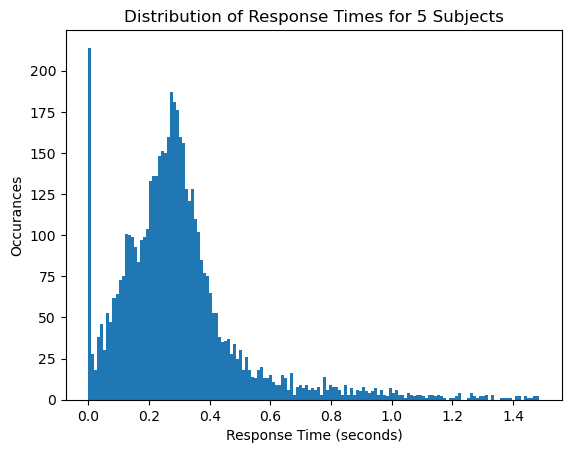

In [79]:
rts = dfn["RT"]
plt.hist(np.array(rts),bins=150)
plt.xlabel('Response Time (seconds)')
plt.ylabel('Occurances')
plt.title(f'Distribution of Response Times for {len(subject_names)} Subjects')

Text(0.5, 1.0, 'Distribution of Response Times for 5 Subjects')

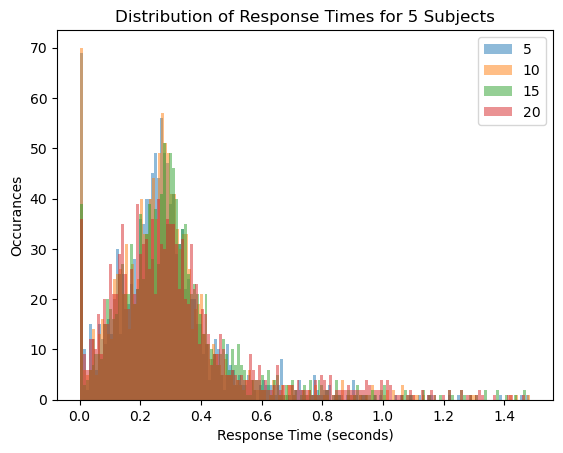

In [80]:
for ecc in [5,10,15,20]:
    eccdata = dfn[dfn['eccentricity']==ecc]
    #histogram of RTs
    rts = eccdata["RT"]
    plt.hist(np.array(rts),bins=150,label=ecc,alpha=0.5)
    plt.legend()
plt.xlabel('Response Time (seconds)')
plt.ylabel('Occurances')
plt.title(f'Distribution of Response Times for {len(subject_names)} Subjects')

# overall accuracy

In [81]:
print('Overall')
for ecc in [5,10,15,20]:
    eccdata = dfn[dfn['eccentricity']==ecc]
    #histogram of RTs
    corr = eccdata["correct"]
    mn = np.nanmean(np.array(corr))
    print(f'Accuracy for ecc {ecc}: {mn}')    

print('\nAppear')
for ecc in [5,10,15,20]:
    eccdata = dfn[dfn['eccentricity']==ecc]
    eccdata = eccdata[eccdata['target']=='a']
    #histogram of RTs
    corr = eccdata["correct"]
    mn = np.nanmean(np.array(corr))
    print(f'Accuracy for ecc {ecc}: {mn}')

print('\nDisappear')
for ecc in [5,10,15,20]:
    eccdata = dfn[dfn['eccentricity']==ecc]
    eccdata = eccdata[eccdata['target']=='d']
    #histogram of RTs
    corr = eccdata["correct"]
    mn = np.nanmean(np.array(corr))
    print(f'Accuracy for ecc {ecc}: {mn}')

Overall
Accuracy for ecc 5: 0.9869230769230769
Accuracy for ecc 10: 0.98
Accuracy for ecc 15: 0.8530769230769231
Accuracy for ecc 20: 0.7907692307692308

Appear
Accuracy for ecc 5: 0.98
Accuracy for ecc 10: 0.9815384615384616
Accuracy for ecc 15: 0.8338461538461538
Accuracy for ecc 20: 0.7630769230769231

Disappear
Accuracy for ecc 5: 0.9938461538461538
Accuracy for ecc 10: 0.9784615384615385
Accuracy for ecc 15: 0.8723076923076923
Accuracy for ecc 20: 0.8184615384615385


Overall


Text(0.5, 1.0, 'All Images All Subjects')

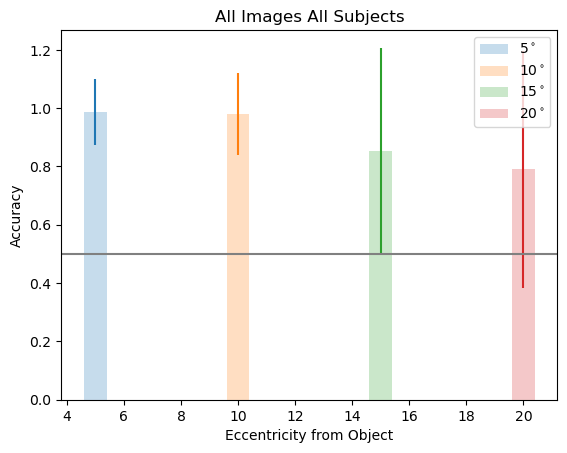

In [82]:
ntrials_remove = 0
dfnr = dfn[dfn['trial']>ntrials_remove]
print('Overall')
for ecc in [5,10,15,20]:
    eccdata = dfnr[dfnr['eccentricity']==ecc]
    #histogram of RTs
    corr = eccdata["correct"]
    mn = np.nanmean(np.array(corr))
    sd = np.nanstd(np.array(corr))
    plt.bar(ecc, mn, label=f'{ecc}$^\circ$', alpha=0.25)
    plt.errorbar(ecc, mn, yerr=sd)
    #print(f'Accuracy for ecc {ecc}: {mn}')
#plt.ylim([0.5,1.])
plt.axhline(0.5,c='grey')
plt.legend()
plt.xlabel('Eccentricity from Object')
plt.ylabel('Accuracy')
#plt.title(f'All Images - first = {ntrials_remove} trial removed')
plt.title(f'All Images All Subjects')

# Per Image

In [83]:
imagefiles = list(dfn['imageFile'].unique())

## Appear & Disapear

Text(0.5, 1.0, 'Accuracy by Eccentriticy and Image for 5 Subjects')

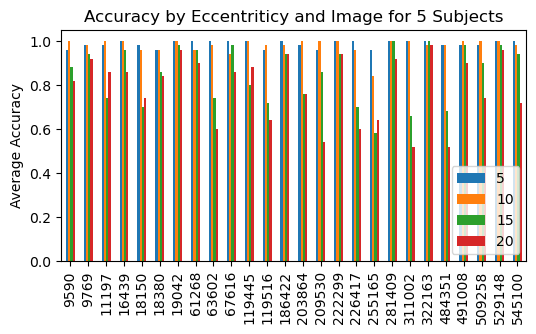

In [84]:
#dfn.groupby('eccentricity').correct.mean().plot.bar()
#dfn.groupby('imageFile').correct.mean().plot.bar()
df_pivot = dfn.pivot_table(
    values="correct",
    index="imageFile",
    columns="eccentricity",
    aggfunc=np.mean
)
#plt.figure()
ax = df_pivot.plot(kind="bar",figsize=(6,3)).legend(loc='lower right')
# ax.set_xticklabels([str(im).zfill(12) for im in list(dfn['imageFile'])])
plt.xlabel(None)
plt.ylabel('Average Accuracy')
plt.title(f'Accuracy by Eccentriticy and Image for {len(subject_names)} Subjects')
# plt.tight_layout()
# plt.savefig(f"./psychophysics_figs_ICLR/per_image_human_acc_TTM_naive.png",dpi=300)

## Appear Only

Text(0.5, 1.0, 'Accuracy for True Appearances by Eccentriticy and Image for 5 Subjects')

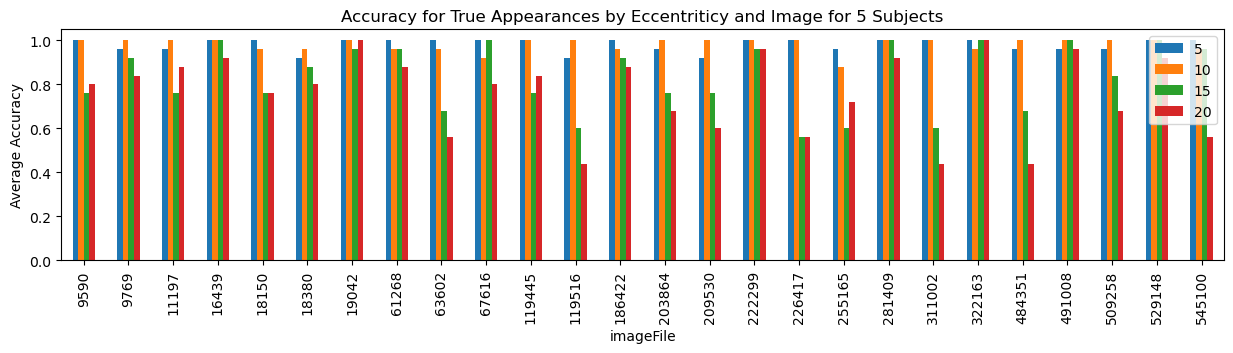

In [85]:
dfna = dfn[dfn['target']=='a']
df_pivot = dfna.pivot_table(
    values="correct",
    index="imageFile",
    columns="eccentricity",
    aggfunc=np.mean
)
#plt.figure()
ax = df_pivot.plot(kind="bar",figsize=(15,3))
plt.legend(loc='best')
plt.ylabel('Average Accuracy')
plt.title(f'Accuracy for True Appearances by Eccentriticy and Image for {len(subject_names)} Subjects')

## Dissapear Only

Text(0.5, 1.0, 'Accuracy for True Disapearances by Eccentriticy and Image for 5 Subjects')

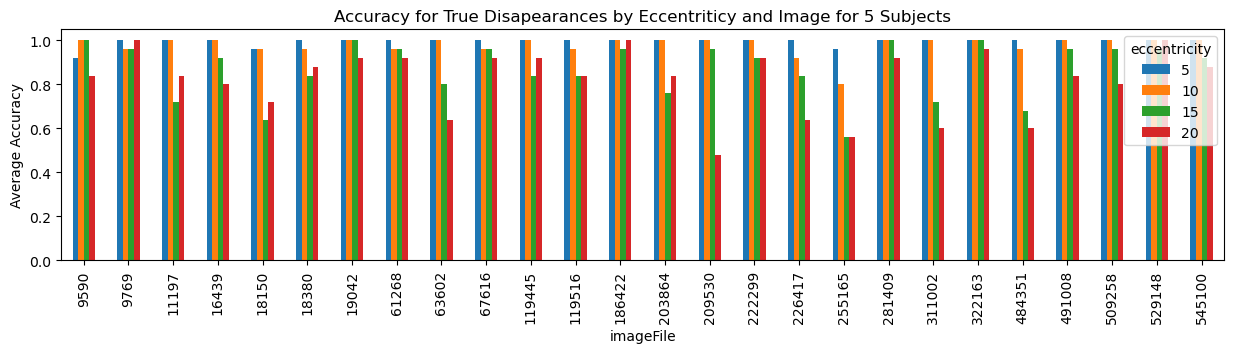

In [86]:
dfnd = dfn[dfn['target']=='d']
df_pivot = dfnd.pivot_table(
    values="correct",
    index="imageFile",
    columns="eccentricity",
    aggfunc=np.mean
)
#plt.figure()
ax = df_pivot.plot(kind="bar",figsize=(15,3))
plt.ylabel('Average Accuracy')
plt.title(f'Accuracy for True Disapearances by Eccentriticy and Image for {len(subject_names)} Subjects')

In [87]:
for imf in imagefiles:
    for ecc in [5,10,15,20]:
        eccdata = dfn[dfn['eccentricity']==ecc]
        eccdata = eccdata[eccdata['imageFile']==imf]
        #histogram of RTs
        corr = eccdata["correct"]
        mn = np.nanmean(np.array(corr))
        print(f'Accuracy for {imf}@{ecc}: {mn}')

Accuracy for 63602@5: 1.0
Accuracy for 63602@10: 0.98
Accuracy for 63602@15: 0.74
Accuracy for 63602@20: 0.6
Accuracy for 18150@5: 0.98
Accuracy for 18150@10: 0.96
Accuracy for 18150@15: 0.7
Accuracy for 18150@20: 0.74
Accuracy for 119516@5: 0.96
Accuracy for 119516@10: 0.98
Accuracy for 119516@15: 0.72
Accuracy for 119516@20: 0.64
Accuracy for 322163@5: 1.0
Accuracy for 322163@10: 0.98
Accuracy for 322163@15: 1.0
Accuracy for 322163@20: 0.98
Accuracy for 255165@5: 0.96
Accuracy for 255165@10: 0.84
Accuracy for 255165@15: 0.58
Accuracy for 255165@20: 0.64
Accuracy for 484351@5: 0.98
Accuracy for 484351@10: 0.98
Accuracy for 484351@15: 0.68
Accuracy for 484351@20: 0.52
Accuracy for 16439@5: 1.0
Accuracy for 16439@10: 1.0
Accuracy for 16439@15: 0.96
Accuracy for 16439@20: 0.86
Accuracy for 529148@5: 1.0
Accuracy for 529148@10: 1.0
Accuracy for 529148@15: 0.98
Accuracy for 529148@20: 0.96
Accuracy for 226417@5: 1.0
Accuracy for 226417@10: 0.96
Accuracy for 226417@15: 0.7
Accuracy for 2264